In [1]:
# In the movie dataset we will try to classify whether movie recieved any Oscar or not using Decision Tree

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


from sklearn.metrics import (confusion_matrix, accuracy_score, plot_roc_curve,
                            ConfusionMatrixDisplay, auc, classification_report, f1_score)



In [3]:
try:
    # See #1137: this allows compatibility for scikit-learn >= 0.24
    from sklearn.utils import safe_indexing
except ImportError:
    from sklearn.utils import _safe_indexing

In [4]:
import yellowbrick

In [5]:
from yellowbrick.classifier import ROCAUC

In [6]:
data = pd.read_csv('./data/Movie_classification.csv')

In [7]:
data.shape

(506, 19)

In [8]:
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [9]:
data['Start_Tech_Oscar'].value_counts()

1    276
0    230
Name: Start_Tech_Oscar, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [11]:
data['Time_taken'].fillna(data['Time_taken'].mean(), inplace=True)

In [12]:
data.isnull().sum().sum()

0

In [13]:
# Creating Dummy Variables

In [14]:
data = pd.get_dummies(data, columns=['Genre','3D_available'],drop_first=True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['Start_Tech_Oscar'],axis = 1), data['Start_Tech_Oscar'],
                                                   test_size=0.3, random_state=42)

## Building Decision Tree Classifier

In [16]:
clftree = DecisionTreeClassifier(max_depth=3)
clftree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

### Predicting Values

In [17]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

### Evaluating Model Performance

In [18]:
# Confusion Matrix for training data
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[161,   4],
       [130,  59]], dtype=int64)

In [19]:
# Confusion Matrix for test data
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[60,  5],
       [68, 19]], dtype=int64)

In [20]:
# Training data accuracy

accuracy_score(y_train,y_train_pred)

0.6214689265536724

In [21]:
# Test data accuracy

accuracy_score(y_test,y_test_pred)

0.5197368421052632

### Plotting Decision Tree


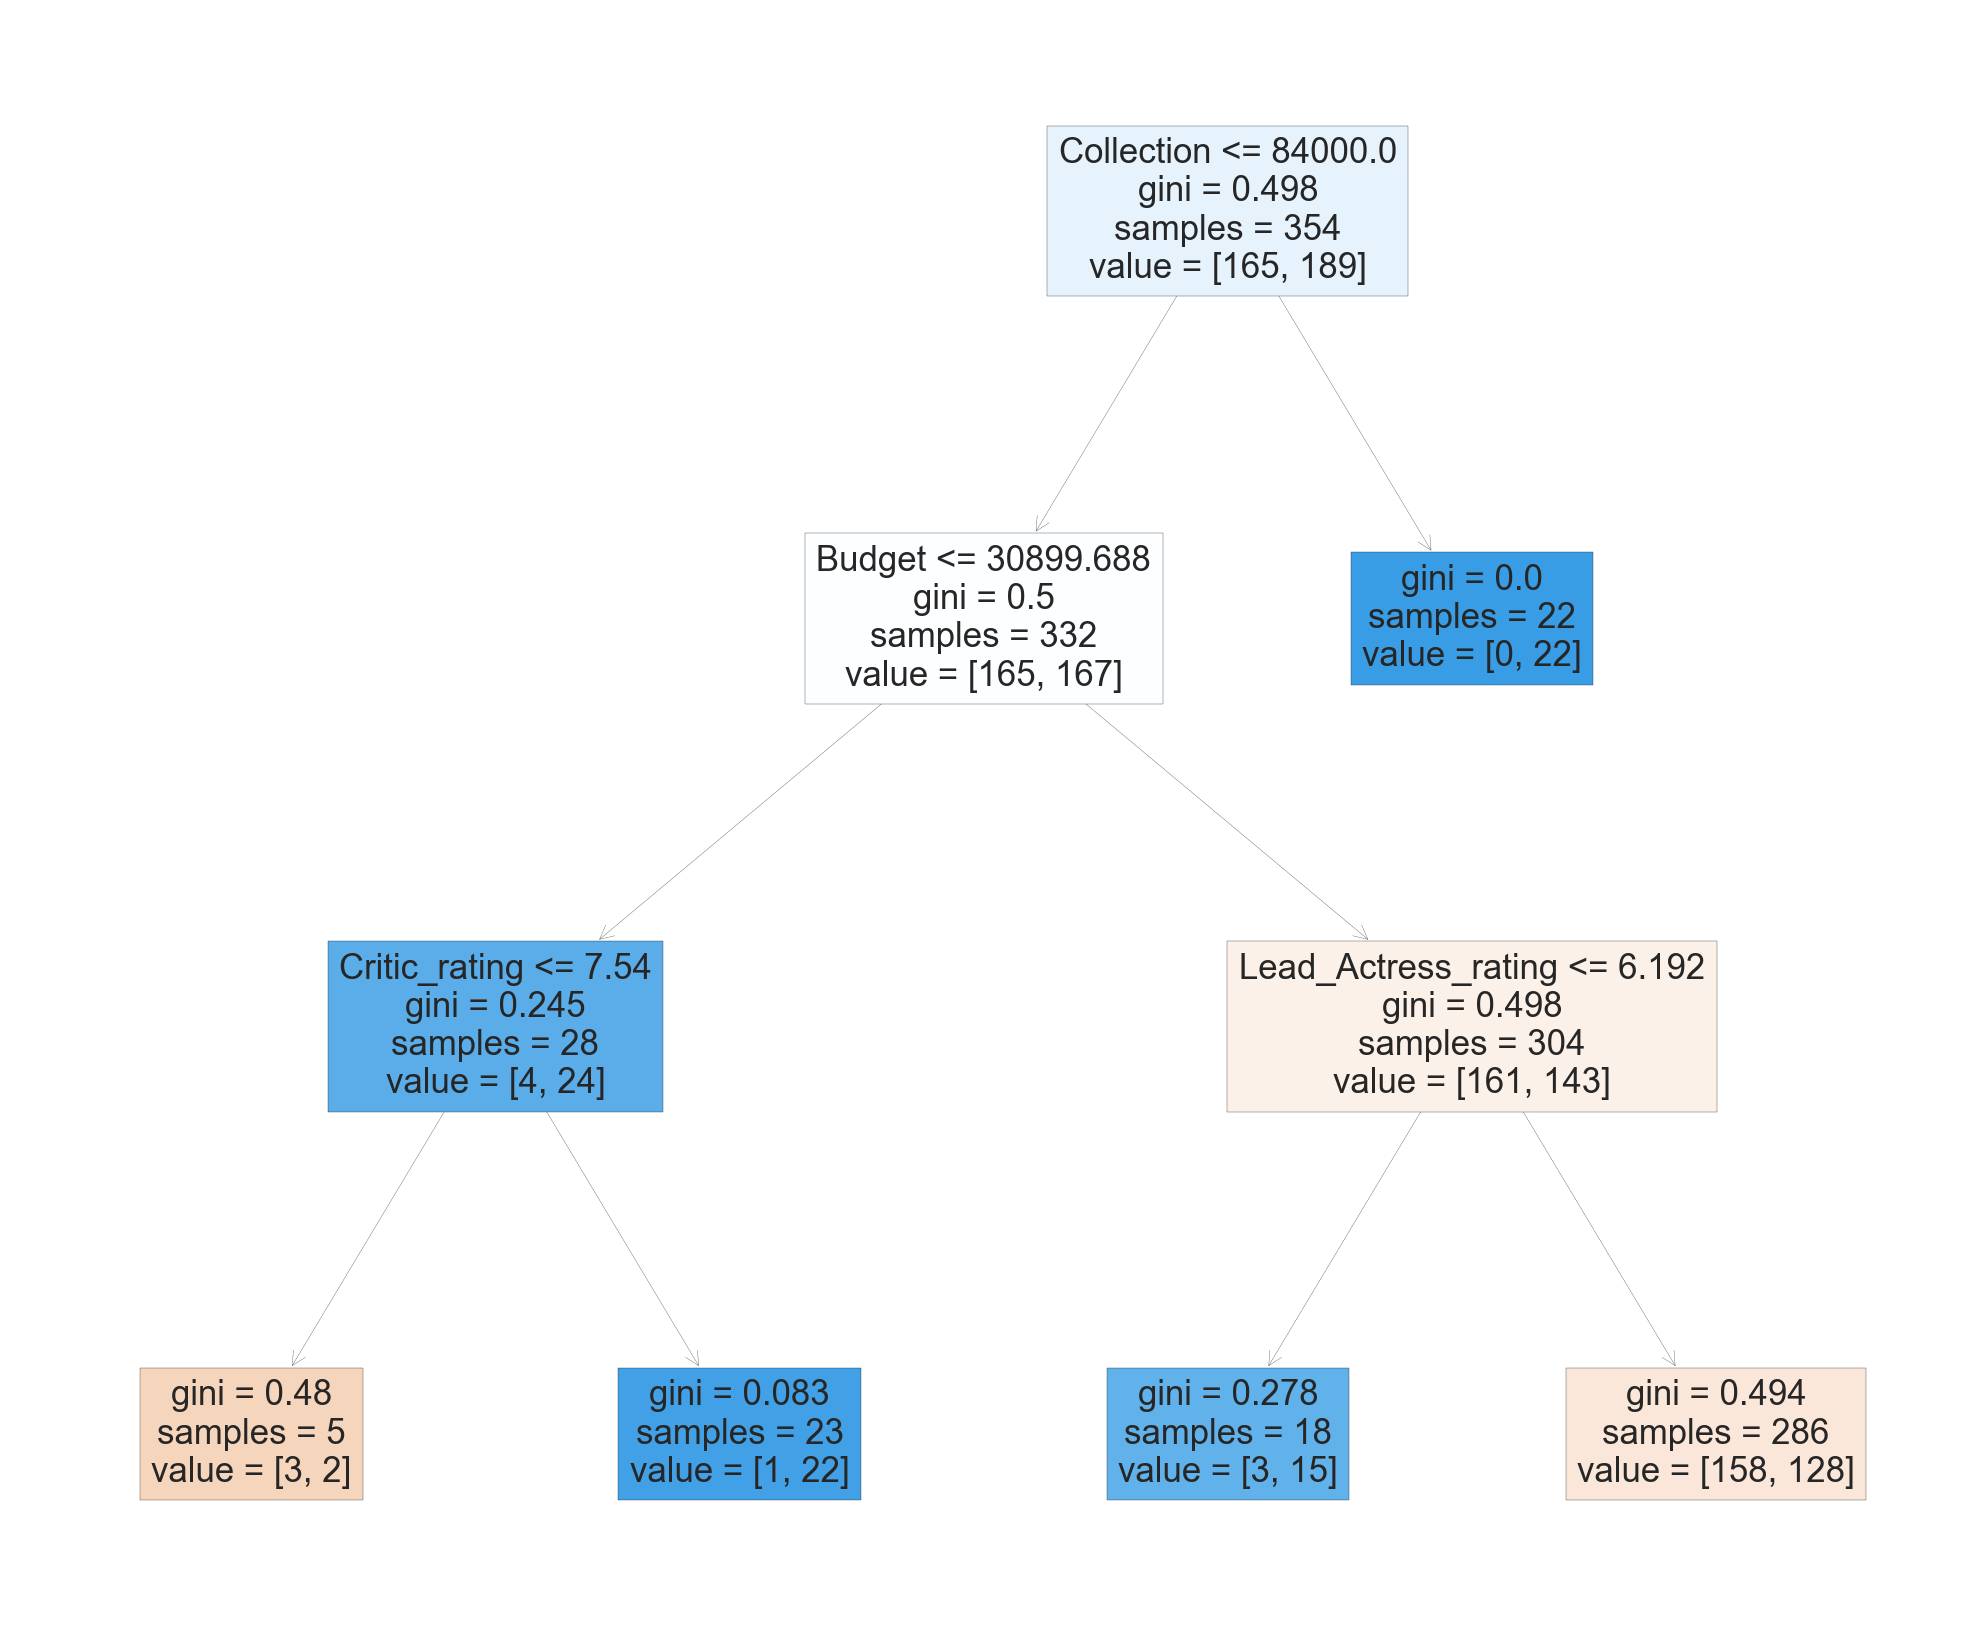

In [22]:
fig = plt.figure(figsize=(35,30))
_ = plot_tree(clftree, filled=True, feature_names=X_train.columns)

In [23]:
### Controlling Tree Growth

In [24]:
clftree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20 )
clftree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20)

In [25]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

In [26]:
# Confusion Matrix for test data
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[58,  7],
       [57, 30]], dtype=int64)

In [27]:
# Test data accuracy

accuracy_score(y_test,y_test_pred)

0.5789473684210527

## Using Bagging

In [28]:
from sklearn.ensemble import BaggingClassifier

In [29]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=0)

In [30]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        min_samples_leaf=20),
                  n_estimators=1000, n_jobs=-1, random_state=0)

In [31]:
cm =  confusion_matrix(y_test, bag_clf.predict(X_test))
cm
                       

array([[35, 30],
       [26, 61]], dtype=int64)

In [32]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.631578947368421

## Using Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs = 1, random_state=0)

In [35]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=1, random_state=0)

In [36]:
cm =  confusion_matrix(y_test, rf_clf.predict(X_test))
cm
     

array([[41, 24],
       [23, 64]], dtype=int64)

In [37]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.6907894736842105

## Grid SearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
rf_clf = RandomForestClassifier(n_estimators=250, random_state=0)

In [40]:
param_grid = {
    'max_features':[4,5,6,7,8,910],
    'min_samples_split':[2,3,10]
}

In [49]:
grid_search = GridSearchCV(rf_clf, param_grid, n_jobs = -1, cv = 5, scoring='accuracy')

In [50]:
grid_search.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\jo

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250, random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 910],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [43]:
grid_search.best_estimator_

RandomForestClassifier(max_features=8, min_samples_split=3, n_estimators=250,
                       random_state=0)

In [44]:
grid_search.best_params_

{'max_features': 8, 'min_samples_split': 3}

In [45]:
cvrf_clf = grid_search.best_estimator_

In [46]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.6842105263157895

### Plot ROC AUC CUrve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


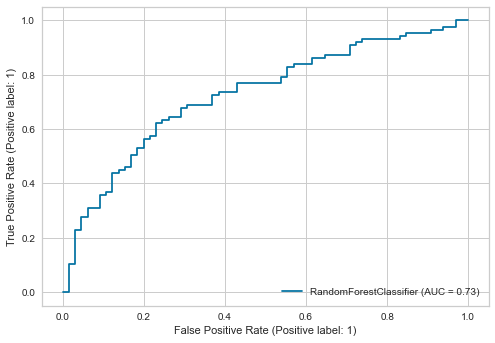

In [47]:
rf_plot = plot_roc_curve(cvrf_clf, X_test,y_test )


### Yellow Brick


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


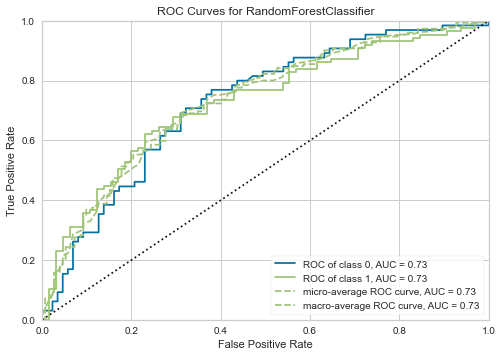

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [51]:
visualizer = ROCAUC(cvrf_clf, classes = [0,1])
visualizer.fit(X_train,y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [52]:
def myrf_model():
    rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs = 1, random_state=0)
    
    